# SEIR模型

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
from torch.utils.tensorboard import SummaryWriter
import torch.utils.data as Data
from torch import nn
import torch.nn.functional as F
from mymodel import *
plt.rcParams['font.family'] = 'SimHei' 
plt.rcParams['axes.unicode_minus'] = False



t = np.linspace(0,20,100)
a=np.array([0.9,0.2,0.5,0.3,0.2])
noise=0.01
BATCH_SIZE=100
k=100

In [2]:
k=100
x=[]
y=[]
for i in range(100):
    re=np.random.random()
    # re=0.5
    u0=np.array([re,1-re,0,0])
    # a0=a+np.random.uniform(0, 0.2, (len(a)))
    a0=np.random.random(5)
    data=REIS(t,u0,a0,noise)
    for j in range(len(data)-1):
        x.append(np.append(data[j],a0).tolist())
        y.append(data[j+1].tolist())
x=torch.tensor(x).to(torch.float32)
y=torch.tensor(y).to(torch.float32)*k
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    # 从数据库中每次抽出batch size个样本
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
)

# ResNet

In [3]:
import torch
from torch.utils.tensorboard import SummaryWriter
from torch import nn
import torch.nn.functional as F
from tqdm import tqdm
module = block_x(4,5)
# 损失函数
loss_fn = nn.MSELoss()
# 优化器
learning_rate = 1e-5
optimizer = torch.optim.Adam(module.parameters())
# optimizer = torch.optim.Adam(module.parameters())
# 训练的轮数
epoch = 1
# 储存路径
work_dir = './ResNet'
# 添加tensorboard
writer = SummaryWriter("{}/logs".format(work_dir))
def train(loader, model, loss_fn, optimizer):
    """
        训练网络
        输入:
            train_dataloader:   训练集的dataloader
            model:              网络模型
            loss_fn:            损失函数
            optimizer:          优化器
        """
    # 切换到train模式
    model.train()
    # 遍历dataloader
    train_step=0
    best=2
    loop = tqdm(enumerate(loader), total =len(loader))
    for step,(x,y) in loop:
        
        # 输入数据到模型里得到输出
        pred = model(x)
        # 计算输出和标签的loss
        l=torch.zeros(x.shape)
        loss = loss_fn(pred, y)
        # 反向推导
        optimizer.zero_grad()
        loss.backward()
        # 步进优化器
        optimizer.step()
        los=float(loss)
        if los<best:
            torch.save(model.state_dict(), "./data/random_model_parameter.pkl")
            best=los
        # print(los,best)
        train_step+=1
        loop.set_postfix(loss=los,best=best)

2022-12-04 16:27:24.658235: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 16:27:26.002452: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-04 16:27:26.002981: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-04 16:27:26.189856: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-04 16:27:40.764680: W tensorflow/stream_executor/platform/de

In [6]:
# for i in range(3):
#     train(loader,module, loss_fn, optimizer)
re=np.random.random()
a=np.random.random(5)
re=0.5
a=np.array([0.9,0.2,0.5,0.3,0.2])
u0=[re,1-re,0,0]
res=REIS(t,u0,a)
module.load_state_dict(torch.load("./data/random_model_parameter.pkl"))
x=torch.tensor(np.append(u0,a).reshape(1,9)).to(torch.float32)
l=[]
for i in range(100):
    req=module(x)/k
    l.append(req.tolist()[0])
    x[:,:4]=req
plt.plot(l)
# plt.show()
plt.plot(res[1:],'.')
plt.show()

RuntimeError: Error(s) in loading state_dict for block_x:
	size mismatch for l2.weight: copying a param with shape torch.Size([32, 64]) from checkpoint, the shape in current model is torch.Size([64, 64]).
	size mismatch for l2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for l3.weight: copying a param with shape torch.Size([16, 32]) from checkpoint, the shape in current model is torch.Size([32, 64]).
	size mismatch for l3.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for l4.weight: copying a param with shape torch.Size([4, 16]) from checkpoint, the shape in current model is torch.Size([4, 32]).

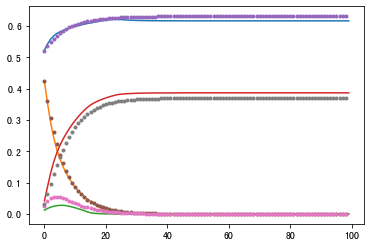

In [ ]:
re=np.random.random()
a=np.random.random(5)
re=0.5
# a=np.array([0.9,0.2,0.5,0.3,0.2])+np.random.uniform(0, 0.2, (len(a)))
a0=np.random.random(5)
u0=[re,1-re,0,0]
res=REIS(t,u0,a)
module.load_state_dict(torch.load("./data/random_model_parameter.pkl"))
x=torch.tensor(np.append(u0,a).reshape(1,9)).to(torch.float32)
l=[]
for i in range(100):
    req=module(x)/k
    l.append(req.tolist()[0])
    x[:,:4]=req
plt.plot(l)
# plt.show()
plt.plot(res[1:],'.')
plt.show()